# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: akhmad aziz mario
- Email: azizmario0502@gmail.com
- ID Dicoding: akhmad aziz mario

## Menentukan Pertanyaan Bisnis
1. Manakah produk yang memiliki volume penjualan tertinggi dan terendah? 
2. Bagaimana kinerja penjualan dan pendapatan perusahaan dalam beberapa bulan terakhir?

## Menyiapkan library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

## Data Wrangling

### 1. Gathering data 

In [2]:
url = "https://raw.githubusercontent.com/akhmadazizmario/analisis_data_dicoding/main/E-Commerce%20Public%20Dataset/customers_dataset.csv"
response = requests.get(url)
data = response.content

customers_df = pd.read_csv(io.StringIO(data.decode('utf-8')))
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
url = "https://raw.githubusercontent.com/akhmadazizmario/analisis_data_dicoding/main/E-Commerce%20Public%20Dataset/orders_dataset.csv"
response = requests.get(url)
data = response.content

orders_df = pd.read_csv(io.StringIO(data.decode('utf-8')))
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
url = "https://raw.githubusercontent.com/akhmadazizmario/analisis_data_dicoding/main/E-Commerce%20Public%20Dataset/order_items_dataset.csv"
response = requests.get(url)
data = response.content

orders_items_df = pd.read_csv(io.StringIO(data.decode('utf-8')))
orders_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
url = "https://raw.githubusercontent.com/akhmadazizmario/analisis_data_dicoding/main/E-Commerce%20Public%20Dataset/order_payments_dataset.csv"
response = requests.get(url)
data = response.content

order_payments_df = pd.read_csv(io.StringIO(data.decode('utf-8')))
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
url = "https://raw.githubusercontent.com/akhmadazizmario/analisis_data_dicoding/main/E-Commerce%20Public%20Dataset/order_reviews_dataset.csv"
response = requests.get(url)
data = response.content

order_reviews_df = pd.read_csv(io.StringIO(data.decode('utf-8')))
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
url = "https://raw.githubusercontent.com/akhmadazizmario/analisis_data_dicoding/main/E-Commerce%20Public%20Dataset/products_dataset.csv"
response = requests.get(url)
data = response.content

products_df = pd.read_csv(io.StringIO(data.decode('utf-8')))
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
url = "https://raw.githubusercontent.com/akhmadazizmario/analisis_data_dicoding/main/E-Commerce%20Public%20Dataset/product_category_name_translation.csv"
response = requests.get(url)
data = response.content

product_translations_df = pd.read_csv(io.StringIO(data.decode('utf-8')))
product_translations_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 2. Assesing data

#### Menilai data customers_df

In [9]:
# melihat informasi pada data
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
# melihat informasi terkait missing values pada data
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
# melihat informasi terkait duplikasi data
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
# melihat parameter statistik pada data
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai data orders_df

In [13]:
# melihat informasi pada data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
# melihat informasi terkait missing values pada data
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
# melihat informasi terkait duplikasi data
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
# melihat parameter statistik pada data
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai data orders_items_df

In [17]:
# melihat informasi pada data
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
# melihat informasi terkait missing values pada data
orders_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
# melihat informasi terkait duplikasi data
print("Jumlah duplikasi: ", orders_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
# melihat parameter statistik pada data
orders_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai data order_payments_df

In [21]:
# melihat informasi pada data
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
# melihat informasi terkait missing values pada data
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [23]:
# melihat informasi terkait duplikasi data
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
# melihat parameter statistik pada data
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai data order_reviews_df

In [25]:
# melihat informasi pada data
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [26]:
# melihat informasi terkait missing values pada data
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [27]:
# melihat informasi terkait duplikasi data
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [28]:
# melihat parameter statistik pada data
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai data products_df

In [29]:
# melihat informasi pada data
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [30]:
# melihat informasi terkait missing values pada data
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [31]:
# melihat informasi terkait duplikasi data
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
# melihat parameter statistik pada data
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai data product_translations_df

In [33]:
# melihat informasi pada data
product_translations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [34]:
# melihat informasi terkait missing values pada data
product_translations_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [35]:
# melihat informasi terkait duplikasi data
print("Jumlah duplikasi: ", product_translations_df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
# melihat parameter statistik pada data
product_translations_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### 3. Cleaning data

Berdasarkan proses Assessing Data, beberapa hal yang perlu melalui Cleaning data adalah berikut:

Data orders:
1. Kesalahan tipe data (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date)
=> mengubah menjadi datetime
2. terdapat missing values pada kolom order_approved_at, order_delivered_carrier_date, & order_delivered_customer_date

Data order_reviews:
1. Kesalahan tipe data (review_creation_date & review_answer_timestamp)
=> mengubah menjadi datetime
2. Terdapat missing values pada kolom review_comment_title & review_comment_message

Data products:
1. Terdapat missing values pada semua kolom kecuali kolom product_id

#### Membersihkan data orders_df

Mengganti tipe data pada kolom (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) 
menjadi datetime menggunakan fungsi to_datetime()

In [37]:
orders_datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in orders_datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [38]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [39]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Dalam kasus ini, tidak menggunakan dua cara untuk menangani missing values, yaitu imputation dan interpolation. Alasannya adalah karena missing values tersebut berkaitan dengan waktu.

Jumlah missing values ini relatif sedikit jika dibandingkan dengan keseluruhan data yang tersedia. Oleh karena itu, memutuskan untuk melakukan proses dropping pada baris yang memuat missing values.

In [40]:
orders_df.dropna(axis=0, inplace=True)

In [41]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### Membersihkan data order_reviews_df

Mengganti tipe data pada kolom (review_creation_date, review_answer_timestamp) 
menjadi datetime menggunakan fungsi to_datetime()

In [42]:
order_reviews_datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in order_reviews_datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [43]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [44]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


Melihat jumlah missing values pada data 

In [45]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Berdasarkan hasil data di atas, diketahui masih banyak informasi penting yang dimiliki oleh baris yang memuat missing values.

- Data yang memuat missing values adalah informasi berupa tulisan atau review dari konsumen yang bersifat kualitatif dan cenderung digunakan untuk analisis sentimen. 
- Sedangkan, terdapat informasi review_score yang memuat nilai review dari konsumen (kuantitatif) dan sudah mewakili penilaian review dari konsumen.

Oleh karena itu, kolom yang memuat missing values (review_comment_title & review_comment_message) dapat dihilangkan (dropping) karena sudah diwakilkan oleh kolom review_score

In [46]:
columns_to_drop = ['review_comment_title', 'review_comment_message']
order_reviews_df = order_reviews_df.drop(columns_to_drop, axis=1)

In [47]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


#### Membersihkan data product_df

Melihat jumlah missing values pada data 

In [48]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Jumlah missing values ini relatif sedikit jika dibandingkan dengan keseluruhan data yang tersedia. Oleh karena itu, memutuskan untuk melakukan proses dropping pada baris yang memuat missing values.

In [49]:
products_df.dropna(axis=0, inplace=True)

In [50]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis

#### Explore customers_df

In [51]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
70592,922a46283625e9c096bfd998913c470c,781f80ac54444e4020dc3f70f044d8b3,3206,sao paulo,SP
51662,9711a23693eaa23367227bd36040faa5,d1e3e64494186c80b7edf1181b42b0d1,3810,sao paulo,SP
55617,4b6eb13b4edd7bcba2c88a07c522f53a,c9f6a35fdfd118cb8e47d1dde1e52acd,75680,corumbaiba,GO
96173,177b2983fe130cd5cbf3388da41291ba,7003239b9c63035abded93028cb68d01,38400,uberlandia,MG
19404,1e268e4d4dd343a3d8bcb8bc78839569,0822f17656e904dee4ccbcd80419929d,8210,sao paulo,SP


In [52]:
# Melihat rangkuman parameter statistik dari data
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [53]:
# Melihat persebaran jumlah pelanggan berdasarkan kota (city) menggunakan metode groupby().
customers_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

In [54]:
# Melihat persebaran jumlah pelanggan berdasarkan negara bagian (state) menggunakan metode groupby().
customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending = False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

#### Explore orders_items_df dan order_payments_df

In [55]:
orders_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [56]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [57]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
60727,ef2694b6887c4448f5daa99866191d84,1,credit_card,8,218.27
15218,7bea83629cbad77571dcccb181fc2a6f,1,credit_card,1,119.93
42123,40fea2b67e4cad47bcdfea4cef5035ad,1,credit_card,4,45.52
48252,0263464225bdea582f602c369c2b6061,1,credit_card,4,56.94
464,968ce3e13bbc09dc91d26a2f0208d99d,1,credit_card,5,200.55


In [58]:
# Memperoleh informasi terkait jumlah pada tiap status pembayaran
order_payments_df.groupby(by="payment_type").order_id.count()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: order_id, dtype: int64

In [59]:
# Membuat sebuah kolom baru bernama “status_payment” pada data orders_items untuk mengidentifikasi items yang sudah dan belum terbayarkan
order_id_in_order_payments_df =  order_payments_df.order_id.tolist()
orders_items_df["status_payment"] = orders_items_df["order_id"].apply(lambda x: "Paid" if x in order_id_in_order_payments_df else "Not yet paid")
orders_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,status_payment
53855,7a73dbb7b879e915cfd13e75852d910d,1,aa280035c50ba62c746480a59045eec4,fa40cc5b934574b62717c68f3d678b6d,2017-10-11 02:49:30,39.90,7.78,Paid
6904,0fa0372b06bb8a9e774500bd29dab06e,1,aa56ab71ba080a7d38971fc64e9cb732,1900267e848ceeba8fa32d80c1a5f5a8,2018-08-02 16:50:15,19.99,12.80,Paid
56372,80341e701b91f4e9f068a3ec40fb0440,1,6f66ef344e1db8560c3d036ee214f355,fc4751cfe3b279c419615b9b00c1abb4,2017-02-25 14:53:00,453.70,17.35,Paid
111311,fcde2f7449493b4f207a23fae117b0fb,1,0d8c64a12c0e49b2515674c031b965a1,c6218512d16fcac0af02fe92691cf274,2017-06-01 00:33:09,55.00,17.64,Paid
104957,ee748540786ca7a510e0889be7ef88ca,1,4025ee582ef6b8c478af3b44cf89054b,da8622b14eb17ae2831f4ac5b9dab84a,2018-01-18 02:35:48,24.90,9.09,Paid


In [60]:
orders_items_df.groupby(by="status_payment").order_id.count()

status_payment
Not yet paid         3
Paid            112647
Name: order_id, dtype: int64

In [62]:
# Melakukan merge terhadap order_items dan order_payments
order_items_payments_df = pd.merge(
    left=orders_items_df,
    right=order_payments_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
order_items_payments_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,status_payment,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Paid,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,Paid,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Paid,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,Paid,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Paid,1.0,credit_card,3.0,218.04


#### Explore orders_df dan order_reviews_df

In [63]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224
unique,98410,98673,NaN,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,NaN,NaN
freq,3,3,NaN,NaN,NaN
mean,NaN,NaN,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35


In [64]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [65]:
# Memperoleh informasi terkait jumlah pada tiap status pembelian
orders_df.groupby(by="order_status").order_id.count()

order_status
canceled         6
delivered    96455
Name: order_id, dtype: int64

In [66]:
# Melakukan merge terhadap order_reviews dan orders
order_reviews_orders_df = pd.merge(
    left=order_reviews_df,
    right=orders_df,
    how="right",
    left_on="order_id",
    right_on="order_id"
)
order_reviews_orders_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,359d03e676b3c069f62cadba8dd3f6e8,949d5b44dbf5de918fe9c16f97b45f8a,5.0,2017-12-03,2017-12-05 19:21:58,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,e50934924e227544ba8246aeb3770dd4,ad21c59c0840e6cb83a9ceb5573f8159,5.0,2018-02-17,2018-02-18 13:02:51,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


#### Explore data order_items, order_payments, order_reviews, dan orders

In [67]:
orders_all_df = pd.merge(
    left=order_reviews_orders_df,
    right=order_items_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_all_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_id,seller_id,shipping_limit_date,price,freight_value,status_payment,payment_sequential,payment_type,payment_installments,payment_value
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Paid,1.0,credit_card,1.0,18.12
1,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Paid,3.0,voucher,1.0,2.00
2,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Paid,2.0,voucher,1.0,18.59
3,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Paid,1.0,boleto,1.0,141.46
4,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Paid,1.0,credit_card,3.0,179.12


In [68]:
# Memperoleh informasi terkait jumlah pada tiap review_score
orders_all_df.groupby(by="review_score").order_id.count()

review_score
1.0    13121
2.0     3898
3.0     9649
4.0    22145
5.0    66032
Name: order_id, dtype: int64

In [69]:
# Memperoleh informasi terkait jumlah pada tiap order_status
orders_all_df.groupby(by="order_status").order_id.count()

order_status
canceled          7
delivered    115699
Name: order_id, dtype: int64

In [70]:
# Memperoleh informasi terkait jumlah pada tiap jenis metode pembayaran
orders_all_df.groupby(by="payment_type").order_id.count()

payment_type
boleto         22490
credit_card    85371
debit_card      1661
voucher         6181
Name: order_id, dtype: int64

#### Explore  customers dan orders_all

In [71]:
# membuat sebuah kolom baru bernama “status” pada data customers_df untuk mengidentifikasi pelanggan yang belum pernah melakukan order
customer_id_in_orders_all_df =  orders_all_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_all_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
6544,7c3f8286d229c232d2fec7d8e750e7ea,d4a5e9f19897de65433c9d97bf4b9f8e,4195,sao paulo,SP,Active
95256,3d74941245d65a43d206256df9a88a89,a37f74cf2de2112a7de0b9e8b305d43e,19031,presidente prudente,SP,Active
2900,6e5de1873d0ad45ce1e58f61dac35761,c12574e43ad5e460b325515c238e651c,19820,taruma,SP,Active
52172,ddc49820b80baa11c1fd013d27e171fd,14aa0f879bc9e1d191221462a5fce802,95110,caxias do sul,RS,Active
15263,bb8edaaa3e1c1233e6c0c2692676c0a3,b1cea2fe484ca4819c2f6a48563d03bf,92440,canoas,RS,Non Active


In [72]:
customers_df.groupby(by="status").customer_id.count()

status
Active        96461
Non Active     2980
Name: customer_id, dtype: int64

In [73]:
# melakukan merge terhadap data orders_df dan customers_df.
orders_all_customers_df = pd.merge(
    left=orders_all_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_all_customers_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,status_payment,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,Paid,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,Paid,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
2,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,Paid,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
3,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,Paid,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
4,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,Paid,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active


In [74]:
orders_all_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115706 entries, 0 to 115705
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      114845 non-null  object        
 1   order_id                       115706 non-null  object        
 2   review_score                   114845 non-null  float64       
 3   review_creation_date           114845 non-null  datetime64[ns]
 4   review_answer_timestamp        114845 non-null  datetime64[ns]
 5   customer_id                    115706 non-null  object        
 6   order_status                   115706 non-null  object        
 7   order_purchase_timestamp       115706 non-null  datetime64[ns]
 8   order_approved_at              115706 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115706 non-null  datetime64[ns]
 10  order_delivered_customer_date  115706 non-null  datetime64[ns]
 11  

#### Explore products_df dan product_translations_df

In [75]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
15369,ba3c7887791624fd8c3fee460dcda417,pet_shop,40.0,617.0,3.0,500.0,24.0,11.0,24.0
31106,2582fbe637afdcd03817b1b16b78fd60,automotivo,60.0,651.0,5.0,4150.0,78.0,4.0,47.0
2544,b95179da85cd8482c7a347e9a0d08466,esporte_lazer,59.0,202.0,3.0,250.0,20.0,5.0,13.0
32605,a386ec77b61471988e1b10cbd6cbfdd6,informatica_acessorios,40.0,226.0,2.0,200.0,25.0,10.0,25.0
30610,122ed0b5404fb93c07b3d35c99e8aaa9,automotivo,57.0,703.0,6.0,4750.0,56.0,11.0,32.0


In [76]:
product_translations_df.sample(5)

,product_category_name,product_category_name_english
3,cama_mesa_banho,bed_bath_table
30,moveis_escritorio,office_furniture
34,artigos_de_festas,party_supplies
37,agro_industria_e_comercio,agro_industry_and_commerce
51,fashion_esporte,fashion_sport


In [77]:
# Melakukan merge terhadap product_category_name_translation dan products
products_all_df = pd.merge(
    left=product_translations_df,
    right=products_df,
    how="right",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_all_df.head()

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,perfumery,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,art,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,sports_leisure,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,bebes,baby,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,utilidades_domesticas,housewares,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Explore all data

membuat sebuah data frame baru bernama all_data_df untuk menampung semua informasi dari semua tabel.

In [78]:
all_data_df = pd.merge(
    left=orders_all_customers_df,
    right=products_all_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_data_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,status,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,Active,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,Active,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,4.0,2017-10-11,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,...,Active,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,4.0,2018-08-08,2018-08-08 18:37:50,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,...,Active,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,5.0,2018-08-18,2018-08-22 19:07:58,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,...,Active,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [78]:
# Melihat preferensi pembelian berdasarkan kategori barang
all_data_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "sum",
    "price": "sum"
})
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115706 entries, 0 to 115705
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      114845 non-null  object        
 1   order_id                       115706 non-null  object        
 2   review_score                   114845 non-null  float64       
 3   review_creation_date           114845 non-null  datetime64[ns]
 4   review_answer_timestamp        114845 non-null  datetime64[ns]
 5   customer_id                    115706 non-null  object        
 6   order_status                   115706 non-null  object        
 7   order_purchase_timestamp       115706 non-null  datetime64[ns]
 8   order_approved_at              115706 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115706 non-null  datetime64[ns]
 10  order_delivered_customer_date  115706 non-null  datetime64[ns]
 11  

In [79]:
# Melihat preferensi pembelian berdasarkan kota.
all_data_df.groupby(by=['customer_city', 'product_category_name_english']).agg({
    "order_item_id": "sum",
    "price": "sum"
})

order_item_id   price
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest                   1.0   39.90
                    cool_stuff                               1.0  199.00
                    sports_leisure                           1.0  120.00
abadiania           small_appliances                         1.0  949.99
abaete              baby                                     1.0   65.00
...                                                          ...     ...
ze doca             food_drink                               1.0   65.00
                    garden_tools                             1.0   39.90
                    musical_instruments                      1.0  359.00
                    sports_leisure                           1.0  149.90
zortea              computers_accessories                    1.0   69.90

[24891 rows x 2 columns]

In [80]:
# Menyimpan dalam csv
all_data_df.to_csv("all_data.csv", index=False)

In [81]:
all_data_df.sample(5)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,status,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
67576,6fcfe06cd3794a1a32a2077b852cfb8b,bcb07f342ee49373aba52b75c41515c2,5.0,2018-02-25,2018-03-01 15:37:23,af7fb1aecf06b1415f21521ac9a8c13e,delivered,2018-02-04 04:04:07,2018-02-04 04:15:28,2018-02-05 23:12:08,...,Active,moveis_decoracao,furniture_decor,56.0,701.0,5.0,750.0,30.0,30.0,11.0
40267,3ef209b875a83df0af48195127081dcb,529a18626bb2bb7907cfcb5b5f2b0e6e,5.0,2017-07-27,2017-07-27 23:28:17,fef445423df985e112e1b8b357f1cbee,delivered,2017-07-18 14:00:00,2017-07-18 14:15:14,2017-07-20 11:35:01,...,Active,cama_mesa_banho,bed_bath_table,59.0,123.0,2.0,300.0,40.0,8.0,30.0
24835,b1ba6f3b70a7a2404fa8d62607a556f4,2b412aeedb11e28a767792c75ae47a1f,5.0,2018-08-22,2018-08-23 01:55:30,e0e5bac5bb3c53c8d9a91aa09b3edbef,delivered,2018-08-15 22:37:30,2018-08-15 22:50:11,2018-08-16 14:52:00,...,Active,perfumaria,perfumery,27.0,311.0,1.0,560.0,19.0,13.0,17.0
115654,c44004d7e60dc281ebd5361b717570c3,5597332b7eded552f104108f22b023e4,5.0,2018-08-18,2018-08-19 13:24:27,aaa423fb52f4106f477683490cbd5845,delivered,2018-08-15 13:03:37,2018-08-15 13:15:22,2018-08-15 14:37:00,...,Active,utilidades_domesticas,housewares,58.0,682.0,2.0,340.0,30.0,6.0,11.0
60937,9dc58b1d4c09f4f208874acde1f70f35,434f170d048d285d4841d3fa653a4507,5.0,2018-08-01,2018-08-01 14:37:54,50e3114b98cadb043f6fa08d104f3433,delivered,2018-07-06 14:58:40,2018-07-06 15:11:20,2018-07-11 12:51:00,...,Active,relogios_presentes,watches_gifts,41.0,408.0,2.0,501.0,18.0,13.0,14.0


## Visusalization & Explanatory Analysis

### 1. Demografi Pelanggan

####           Berdasarkan Metode Pembayaran

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16540\4243387345.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


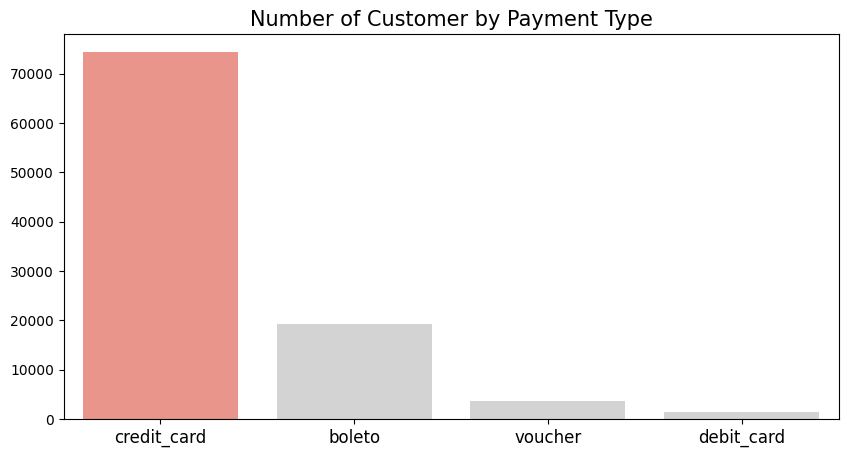

In [82]:
bypayment_df = all_data_df.groupby(by="payment_type").customer_id.nunique().reset_index()
bypayment_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

colors_ = ["#FA897B", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="customer_count",
    x="payment_type",
    data=bypayment_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Payment Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

####           Berdasarkan Review Score

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16540\2212356445.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


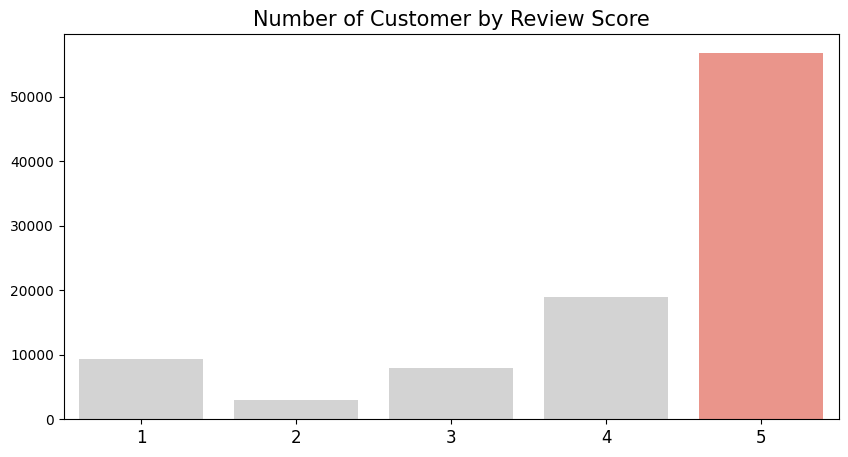

In [83]:
byrating_df = all_data_df.groupby(by="review_score").customer_id.nunique().reset_index()
byrating_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

byrating_df['review_score'] = pd.Categorical(byrating_df['review_score'], [1, 2, 3, 4, 5])

colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",  "#FA897B"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="review_score",
    data=byrating_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Review Score", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

####           Berdasarkan Kota

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16540\1193157930.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


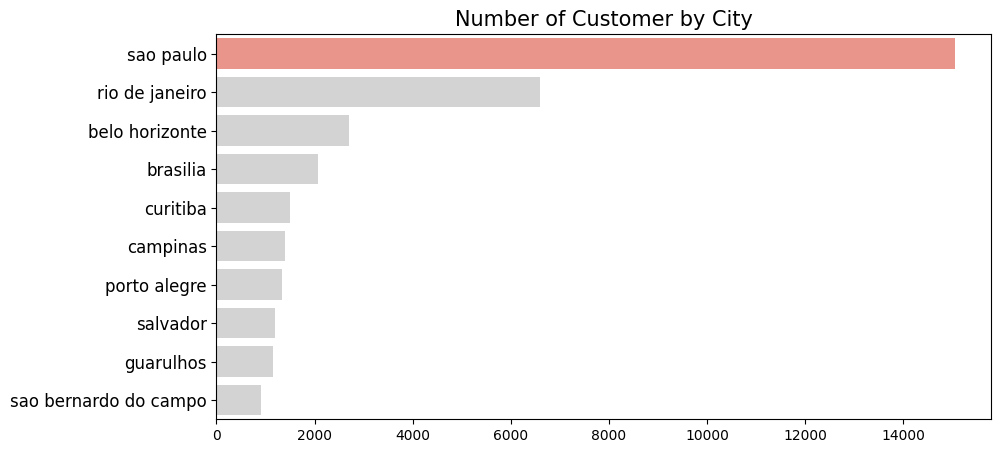

In [84]:
bycity_df = all_data_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df
plt.figure(figsize=(10, 5))
colors_ = ["#FA897B", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### 2. Produk  yang Paling Banyak dan Paling Sedikit Terjual

In [85]:
# Mengurutkan produk berdasarkan frekuensi pembelian tertinggi
sum_order_items_df = all_data_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name_english,order_item_id
0,bed_bath_table,14602.0
1,furniture_decor,11928.0
2,health_beauty,11250.0
3,sports_leisure,10109.0
4,computers_accessories,10043.0
5,housewares,9324.0
6,watches_gifts,6682.0
7,garden_tools,6018.0
8,telephony,5220.0
9,auto,4953.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16540\2571323316.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16540\2571323316.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


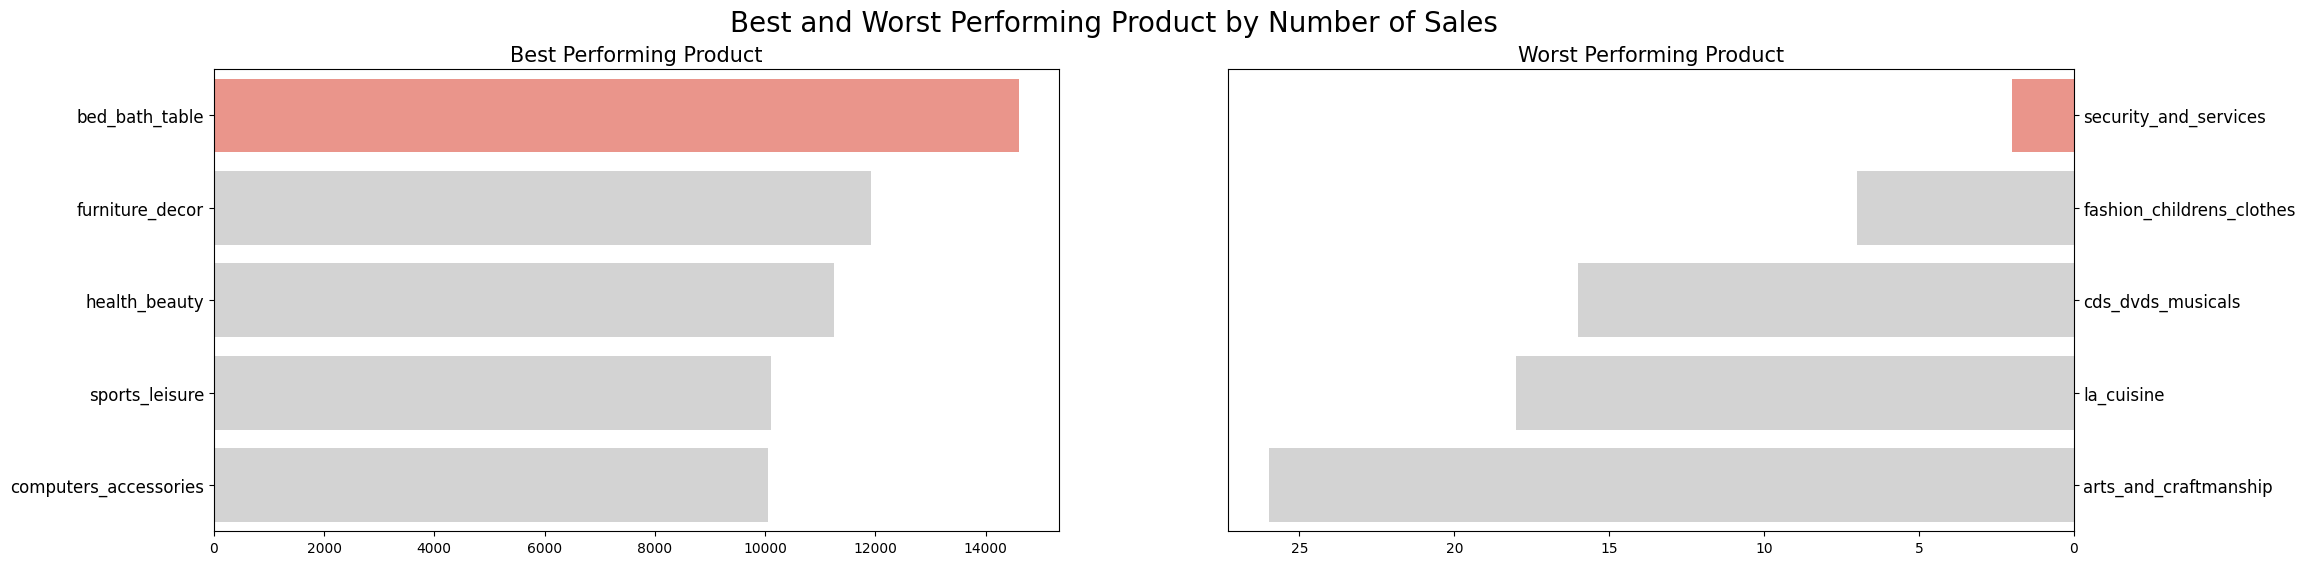

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#FA897B", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### 3. Performa Penjualan & Revenue Perusahaan

In [87]:
# Mengubah frekuensi data untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh setiap bulannya.
monthly_orders_df = all_data_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,1,134.97
1,2016-10,270,42422.66
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,121294.92


#### Jumlah Order per Bulan

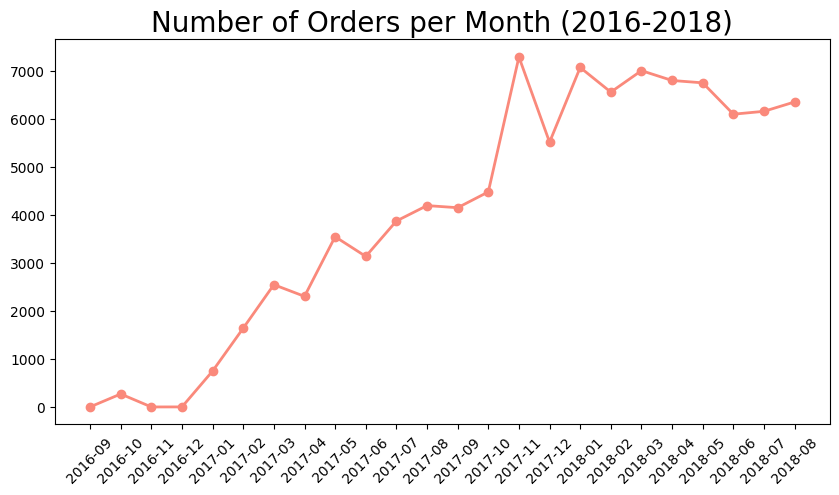

In [88]:
monthly_orders_df = all_data_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#FA897B")
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

#### Revenue per Bulan 

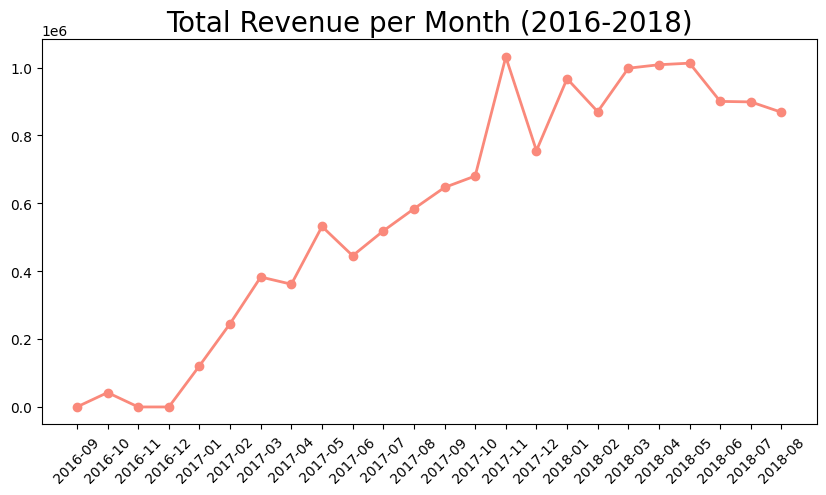

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#FA897B"
)
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

## RFM Analysis

In [90]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115706 entries, 0 to 115705
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      114845 non-null  object        
 1   order_id                       115706 non-null  object        
 2   review_score                   114845 non-null  float64       
 3   review_creation_date           114845 non-null  datetime64[ns]
 4   review_answer_timestamp        114845 non-null  datetime64[ns]
 5   customer_id                    115706 non-null  object        
 6   order_status                   115706 non-null  object        
 7   order_purchase_timestamp       115706 non-null  datetime64[ns]
 8   order_approved_at              115706 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115706 non-null  datetime64[ns]
 10  order_delivered_customer_date  115706 non-null  datetime64[ns]
 11  

In [91]:
rfm_df = all_data_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", 
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [92]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          96461 non-null  object        
 1   max_order_timestamp  96461 non-null  datetime64[ns]
 2   frequency            96461 non-null  int64         
 3   monetary             96461 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.9+ MB


In [93]:
print(rfm_df['max_order_timestamp'].dtype)

datetime64[ns]


In [94]:
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp'])

In [95]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          96461 non-null  object        
 1   max_order_timestamp  96461 non-null  datetime64[ns]
 2   frequency            96461 non-null  int64         
 3   monetary             96461 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.9+ MB


In [96]:
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp'])
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date.max()
recent_date = all_data_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2018-08-29,1,89.80,0
1,000161a058600d5901f007fab4c27140,2018-08-29,1,54.90,0
2,0001fd6190edaaf884bcaf3d49edf079,2018-08-29,1,179.99,0
3,0002414f95344307404f0ace7a26f1d5,2018-08-29,1,149.90,0
4,000379cdec625522490c315e70c7a9fb,2018-08-29,1,93.00,0


In [97]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,0
1,000161a058600d5901f007fab4c27140,1,54.90,0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,0
4,000379cdec625522490c315e70c7a9fb,1,93.00,0


In [98]:
rfm_df.describe()

,frequency,monetary,recency
count,96461.0,96461.000000,96461.0
mean,1.0,143.830349,0.0
std,0.0,237.873948,0.0
min,1.0,0.850000,0.0
25%,1.0,47.650000,0.0
50%,1.0,89.490000,0.0
75%,1.0,154.900000,0.0
max,1.0,13440.000000,0.0


In [99]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,0
64311,aa601b3c45980c0918042d5ca7a25054,1,49.99,0
64310,aa5f8aa4c21fe89a04e8d221d4cd8ac1,1,26.00,0
64309,aa5f87b79875f43b90b310decb62356e,1,135.00,0
64308,aa5f5931b8901ae1ca4b8302f9b94c02,1,79.00,0


### 1. Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [100]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,0,48231.0,48231.0,48368.0
1,000161a058600d5901f007fab4c27140,1,54.90,0,48231.0,48231.0,29841.5
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,0,48231.0,48231.0,77493.5
3,0002414f95344307404f0ace7a26f1d5,1,149.90,0,48231.0,48231.0,71055.5
4,000379cdec625522490c315e70c7a9fb,1,93.00,0,48231.0,48231.0,50712.0


In [101]:
# menormalisasi
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,0,100.0,100.0,50.142545
1,000161a058600d5901f007fab4c27140,1,54.90,0,100.0,100.0,30.936337
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,0,100.0,100.0,80.336613
3,0002414f95344307404f0ace7a26f1d5,1,149.90,0,100.0,100.0,73.662413
4,000379cdec625522490c315e70c7a9fb,1,93.00,0,100.0,100.0,52.572542


In [102]:
# scoring rfm
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(10)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.58
1,000161a058600d5901f007fab4c27140,3.03
2,0001fd6190edaaf884bcaf3d49edf079,4.44
3,0002414f95344307404f0ace7a26f1d5,4.25
4,000379cdec625522490c315e70c7a9fb,3.65
5,0004164d20a9e969af783496f3408652,3.19
6,000419c5494106c306a97b5635748086,2.61
7,00046a560d407e99b969756e0b10f282,4.01
8,00050bf6e01e69d5c0fd612f1bcfb69c,3.34
9,000598caf2ef4117407665ac33275130,4.97


### 2. Segmentasi customer berdasarkan RFM_score

In [103]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.58,Medium value customer
1,000161a058600d5901f007fab4c27140,3.03,Medium value customer
2,0001fd6190edaaf884bcaf3d49edf079,4.44,High value customer
3,0002414f95344307404f0ace7a26f1d5,4.25,High value customer
4,000379cdec625522490c315e70c7a9fb,3.65,Medium value customer
5,0004164d20a9e969af783496f3408652,3.19,Medium value customer
6,000419c5494106c306a97b5635748086,2.61,Low value customers
7,00046a560d407e99b969756e0b10f282,4.01,High value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,3.34,Medium value customer
9,000598caf2ef4117407665ac33275130,4.97,Top customers


In [104]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,17076
1,Low value customers,28965
2,Medium value customer,33636
3,Top customers,16784


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16540\1476173110.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


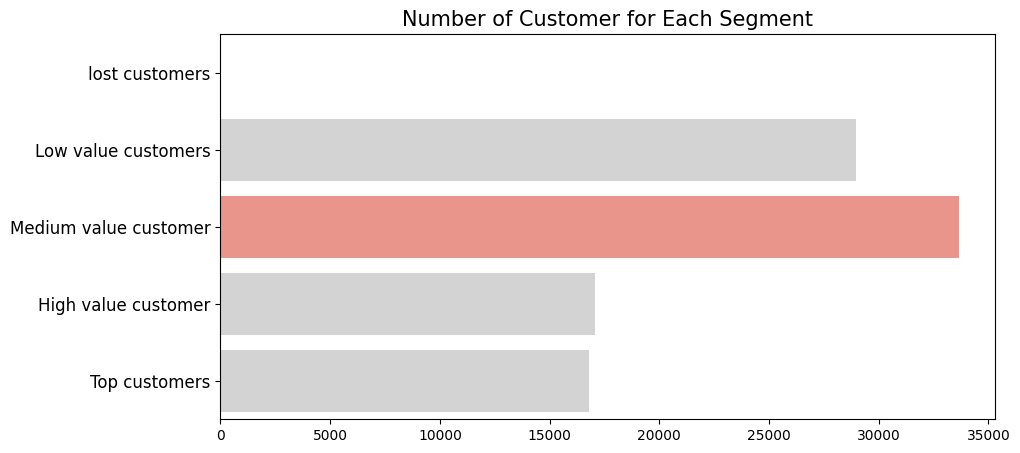

In [105]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#FA897B", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

<br>

<br>

<br>

## CONCLUSION

- saat ini produk yang memiliki volume penjualan tertinggi yaitu bed bath table dan produk dengan volume penjualan terendah yaitu electronics
- kinerja penjualan beberapa bulan terakhir jumlah order naik drastis dan tentunya pendapatan perusahaan dalam beberapa bulan terakhir juga naik 2 kali lipat